In [2]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [8]:
!kaggle datasets download peace1019/fingerprint-dataset-for-fvc2000-db4-b

 42% 11.0M/25.9M [00:00<00:00, 46.5MB/s]
100% 25.9M/25.9M [00:00<00:00, 75.9MB/s]


In [15]:
!unzip fingerprint-dataset-for-fvc2000-db4-b.zip -d sample_data/fingerprint

Archive:  fingerprint-dataset-for-fvc2000-db4-b.zip
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/np_data/img_real.npy  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/np_data/img_train.npy  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/np_data/label_real.npy  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/np_data/label_train.npy  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data/00000.bmp  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data/00001.bmp  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data/00002.bmp  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data/00003.bmp  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data/00004.bmp  
  inflating: sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data/00005.bmp  
  inflating: sample_data/fingerprint/dataset_FVC

In [19]:
import matplotlib.pyplot as plt
import joblib
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

In [23]:
# Define a function to load images from a folder
def load_images_from_folder(folder):

  # Create empty lists to store the images and labels
  images = []
  labels = []

  # Iterate over all of the files in the folder
  for filename in os.listdir(folder):

    # Read the image into memory
    img = cv2.imread(os.path.join(folder,filename), cv2.IMREAD_GRAYSCALE)

    # Check to make sure that the image is not None
    if img is not None:

      # Add the image and label to the corresponding lists
      images.append(img)
      labels.append(int(filename.split('_')[0].split('.')[0]))

  # Return the images and labels
  return images, labels

# Load the training and test datasets
x_train, y_train = load_images_from_folder('/content/sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/train_data')
x_test, y_test = load_images_from_folder('/content/sample_data/fingerprint/dataset_FVC2000_DB4_B/dataset/real_data')

# Print the number of training images and the shape of the first training image
print("Number of training images:", len(x_train))
print("Shape of the first training image:", x_train[0].shape)

Number of training images: 800
Shape of the first training image: (160, 160)


In [24]:
# Convert the list of training images to a NumPy array
x_train = np.array(x_train).reshape(-1, 160, 160, 1).astype('float32') / 255.0

# Convert the list of test images to a NumPy array
x_test = np.array(x_test).reshape(-1, 160, 160, 1).astype('float32') / 255.0

# Convert the list of training labels to one-hot format
y_train = to_categorical(y_train)

# Convert the list of test labels to one-hot format
y_test = to_categorical(y_test)

In [29]:
# Create a sequential model
model = models.Sequential()

# Add a convolutional layer with 32 filters of size 3x3
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(160, 160, 1)))

# Add a max pooling layer with a pooling size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters of size 3x3
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

# Add another max pooling layer with a pooling size of 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output of the previous layer
model.add(layers.Flatten())

# Add a dense layer with 128 neurons
model.add(layers.Dense(128, activation="relu"))

# Add a dense layer with 10 neurons, one for each fingerprint class
model.add(layers.Dense(10, activation="softmax"))

# Compile the model using the Adam optimizer and the categorical cross-entropy loss function
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model for 10 epochs on the training dataset
model.fit(x_train, y_train, epochs=1)

# Evaluate the model on the test dataset and print the test loss and test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


25/25 [==============================] - 36s 1s/step - loss: 3.6787 - accuracy: 0.1000
Test loss: 2.302422046661377
Test accuracy: 0.10000000149011612


In [36]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 [==============================] - 33s 1s/step - loss: 2.2018 - accuracy: 0.2025 - val_loss: 2.2726 - val_accuracy: 0.2000
Epoch 2/25
25/25 [==============================] - 29s 1s/step - loss: 1.8400 - accuracy: 0.4187 - val_loss: 2.1532 - val_accuracy: 0.2000
Epoch 3/25
25/25 [==============================] - 31s 1s/step - loss: 1.2153 - accuracy: 0.5938 - val_loss: 2.0315 - val_accuracy: 0.2000
Epoch 4/25
25/25 [==============================] - 30s 1s/step - loss: 0.8631 - accuracy: 0.7262 - val_loss: 1.8390 - val_accuracy: 0.3000
Epoch 5/25
25/25 [==============================] - 29s 1s/step - loss: 0.6052 - accuracy: 0.8238 - val_loss: 1.4657 - val_accuracy: 0.6000
Epoch 6/25
25/25 [==============================] - 31s 1s/step - loss: 0.4651 - accuracy: 0.8712 - val_loss: 1.4538 - val_accuracy: 0.7000
Epoch 7/25
25/25 [==============================] - 29s 1s/step - loss: 0.2911 - accuracy: 0.9350 - val_loss: 1.1725 - val_accuracy: 0.7000
Epoch 8/25
25/25 [==

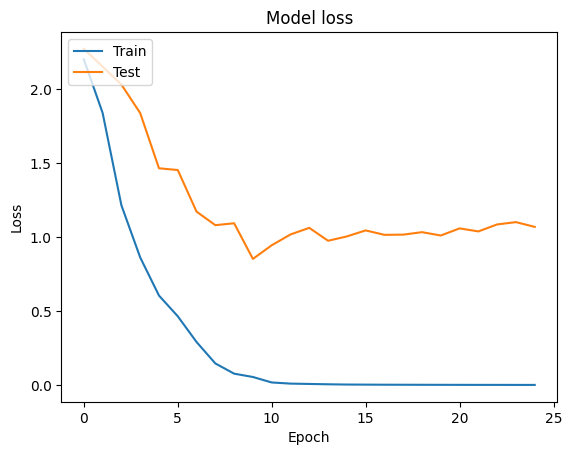

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
# Register a fingerprint
def register_fingerprint(image):

    # Pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape(-1, 160, 160, 1).astype('float32') / 255.0

    # Predict the fingerprint features
    features = model.predict(image)

    # Save the features
    features = features.flatten()
    with open('fingerprint_features.pickle', 'wb') as f:
        joblib.dump(features, f)

# Authenticate a fingerprint
def authenticate_fingerprint(image):

    # Pre-process the image
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (160, 160))
    image = image.reshape(-1, 160, 160, 1).astype('float32') / 255.0

    # Predict the fingerprint features
    features = model.predict(image)

    # Compare the features
    with open('fingerprint_features.pickle', 'rb') as f:
        known_features = joblib.load(f)

    # Use the distance function to compare the features
    dist = np.linalg.norm(features - known_features, axis=1)

    # Authentication result
    if dist < 0.01:
        return True
    else:
        return False


In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import glob
import imageio
from skimage.morphology import skeletonize
from skimage import img_as_bool, img_as_ubyte

In [26]:
img_list = list(glob.glob('sample_data/DB3_B//*.tif'))
print(img_list[0],img_list[1])

sample_data/DB3_B/102_7.tif sample_data/DB3_B/108_2.tif


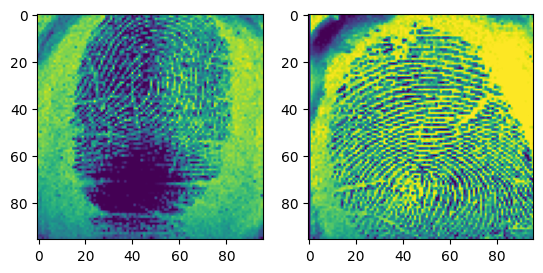

In [27]:
img1 = cv2.imread(img_list[0],cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (96, 96))
img2 = cv2.imread(img_list[1],cv2.IMREAD_GRAYSCALE)
img2 = cv2.resize(img2, (96, 96))
fig, axes = plt.subplots(1,2);
axes[0].imshow(img1);
axes[1].imshow(img2);

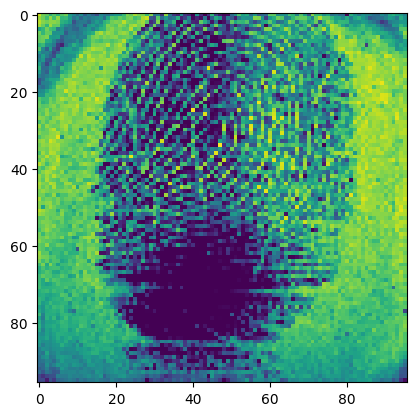

In [ ]:
# Preprocessing
# Normalize the image
image_normalized = cv2.normalize(img1, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.imshow(image_normalized)

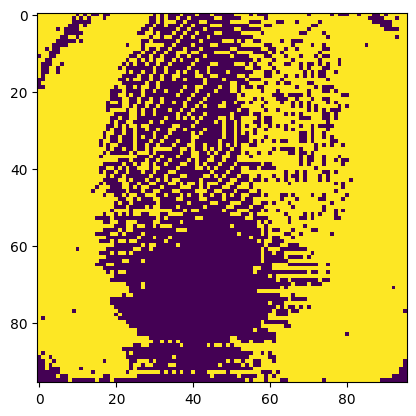

In [ ]:
# Binarize the image
_, image_binarized = cv2.threshold(image_normalized, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(image_binarized)

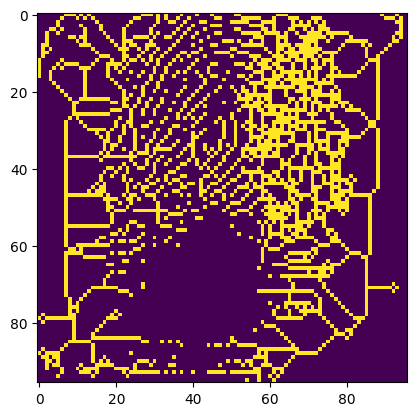

In [ ]:
# Skeletonizate
skeleton = skeletonize(img_as_bool(image_binarized))
skeleton = img_as_ubyte(skeleton)
plt.imshow(skeleton)

In [ ]:
# minutiae detection
def detect_minutiae(skeleton):
  neighbors = [(-1, 0), (-1, 1), (0, 1), (1, 1), (1, 0), (1, -1), (0, -1), (-1, -1)]
  rows, cols = skeleton.shape
  minutiae_endings = []
  minutiae_bifurcations = []
  for i in range(1, rows - 1):
    for j in range(1, cols - 1):
      if skeleton[i, j] == 255:
        cn = 0
        for k in range(8):
          p1 = skeleton[i + neighbors[k][0], j + neighbors[k][1]]
          p2 = skeleton[i + neighbors[(k + 1) % 8][0], j + neighbors[(k + 1) % 8][1]]
          cn += (p1 == 0 and p2 == 255)
        if cn == 1:
          minutiae_endings.append((j, i))
        elif cn == 3:
          minutiae_bifurcations.append((j, i))
  return minutiae_endings, minutiae_bifurcations

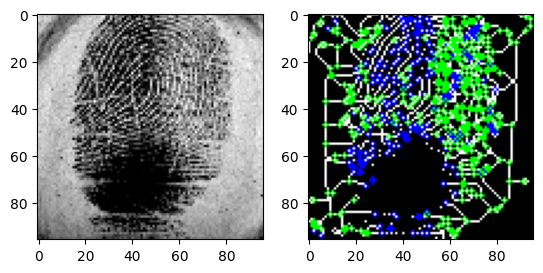

In [ ]:
minutiae_endings, minutiae_bifurcations = detect_minutiae(skeleton)
result_image = cv2.cvtColor(skeleton, cv2.COLOR_GRAY2BGR)
for x, y in minutiae_endings:
    cv2.circle(result_image, (x, y), 1, (0, 0, 255), 1)  # Blue for endings
for x, y in minutiae_bifurcations:
    cv2.circle(result_image, (x, y), 1, (0, 255, 0), 1)  # Green for bifurcations


fig, axes = plt.subplots(1,2)
axes[0].imshow(img1, cmap = "gray")
axes[1].imshow(result_image)
